In [48]:
#Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [49]:
#Load dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # convert breast cancer data to Dataframe
df["target"]=iris.target

In [50]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [52]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [53]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

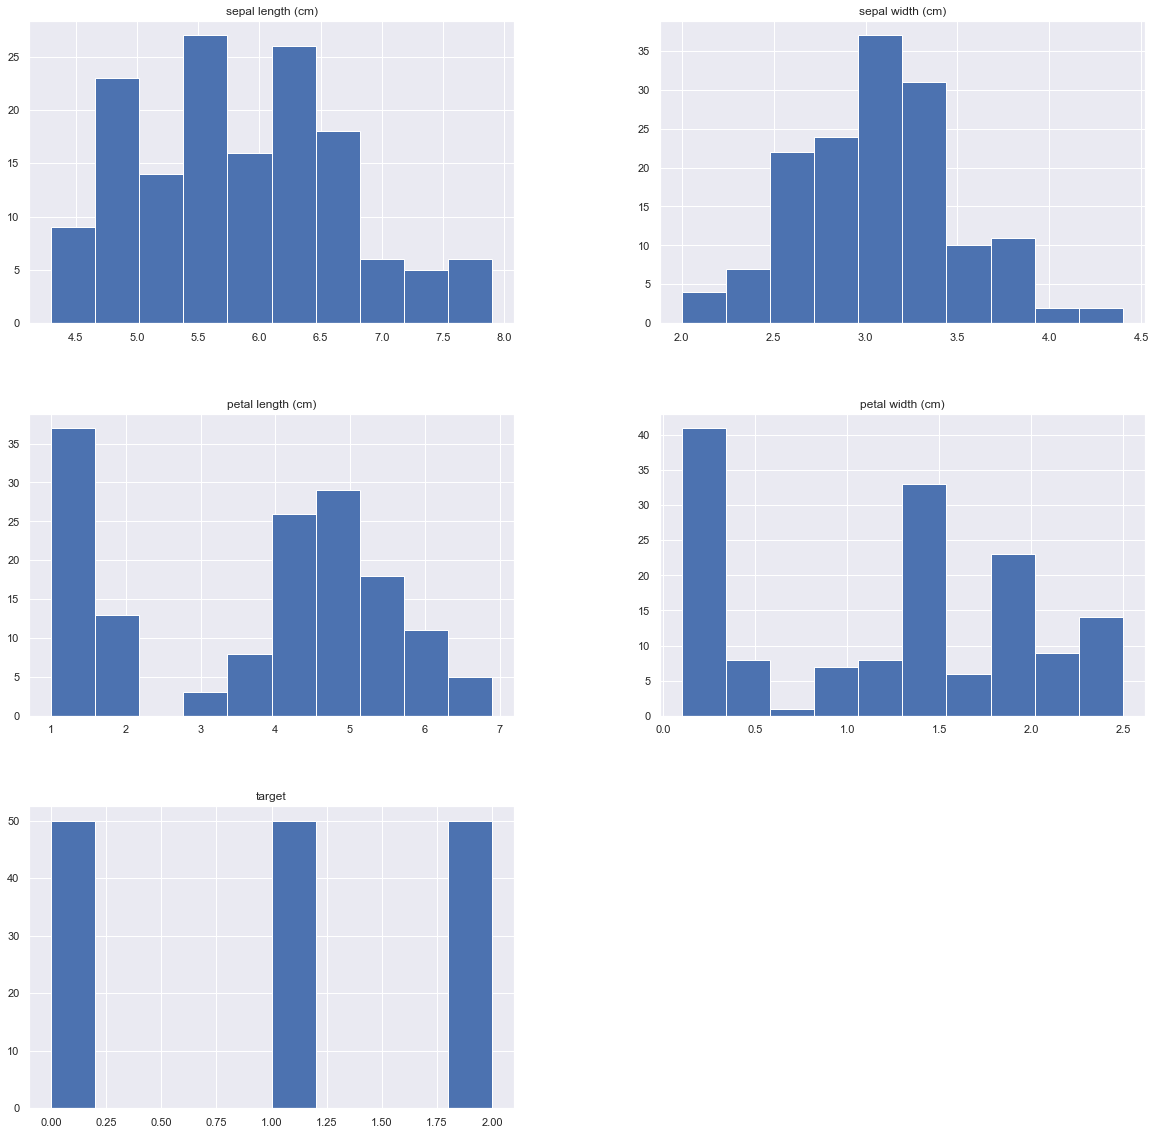

In [54]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

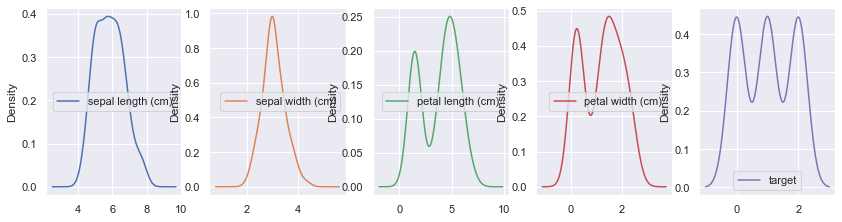

In [55]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [56]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [57]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [58]:
duplicate_values = df[df.duplicated()]
duplicate_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [59]:
df.drop_duplicates(keep='first', inplace=True)

In [60]:
duplicate_values = df[df.duplicated()]
duplicate_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


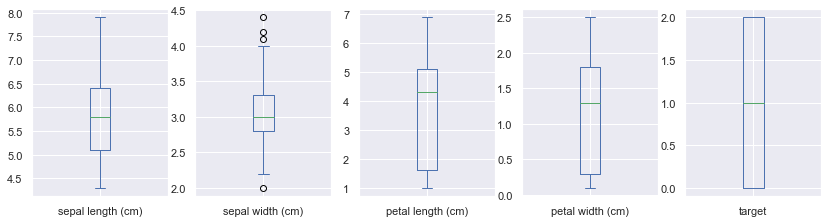

In [61]:
df.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [62]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'target').index
columns

Index(['target', 'petal width (cm)', 'petal length (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

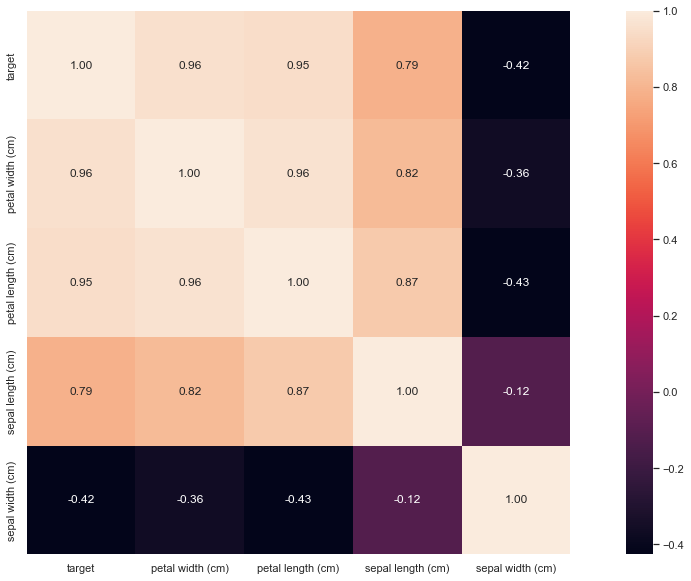

In [63]:
f = plt.figure(figsize=(20, 10))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [64]:
values = df.values

X = values[:,0:4]
Y = values[:,4]

##### Feature Scaling 

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [66]:
df_scaled = pd.DataFrame(X_scaled)

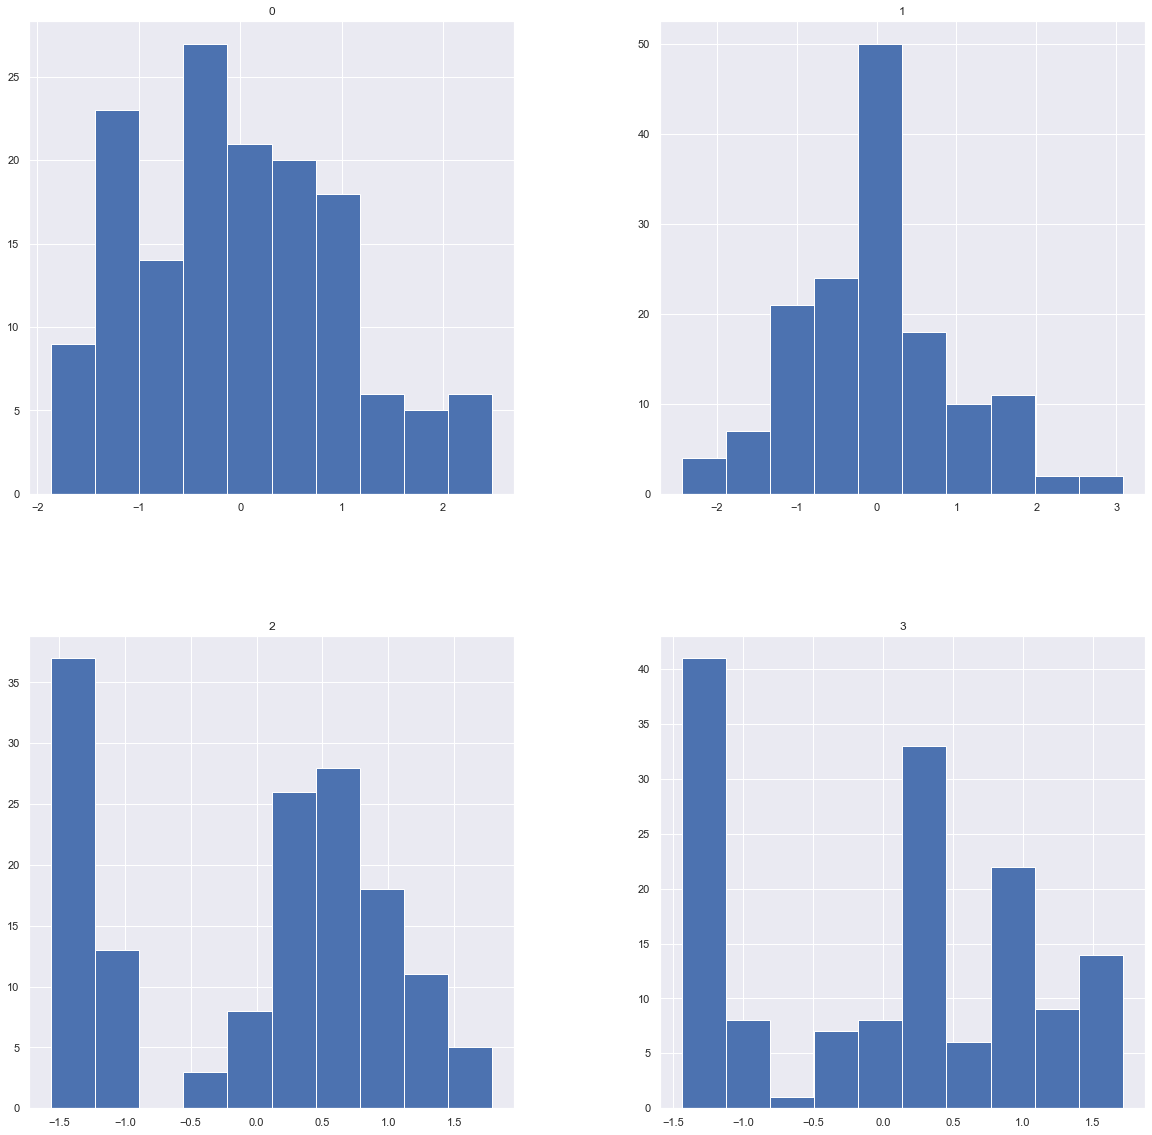

In [67]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [68]:
#Evaluation metric for 13 algorithms

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results_no_noise={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_no_noise[i]=cv_results.mean()

 LR: 0.908008 (+/- 0.075431)
LDA: 0.979690 (+/- 0.033781)
kNN: 0.955421 (+/- 0.047810)
 DT: 0.949815 (+/- 0.053712)
 NB: 0.953859 (+/- 0.053100)
SVM: 0.960176 (+/- 0.051577)
 RF: 0.956522 (+/- 0.048388)
 GB: 0.952425 (+/- 0.051175)
XGB: 0.953590 (+/- 0.045997)
AdaBoost: 0.945580 (+/- 0.054301)
ANN: 0.952694 (+/- 0.048891)


In [69]:
# Multiple results from cross validation for statistical tests

In [70]:
# Create a function that assembles cross validation results

def cv_res (results):  
    
    a = [5,10,15,20,25,30,35,40,45,50]

    x = []

    sum = 0

    for i , result in enumerate(results):
       
        sum += result

        if i+1 in a: 
            x.append(sum/5)
            sum=0
    return x

In [71]:
m =[]
for i in models:
    m.append(i[0])

f1_results = pd.DataFrame()


for i, m in enumerate(m):
    f1_results[str(m)] = cv_res(results[i])

f1_results    

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.946263,0.986532,0.973064,0.973064,0.986532,0.958754,0.973064,0.973064,0.973064,0.973064,0.959865
1,0.890909,0.971717,0.959596,0.930471,0.931582,0.958249,0.944781,0.930471,0.944781,0.930471,0.944781
2,0.932660,0.973333,0.933199,0.959865,0.946397,0.946128,0.946667,0.959865,0.959865,0.946397,0.946667
3,0.885640,0.986532,0.944012,0.944281,0.956638,0.957480,0.970948,0.957749,0.944281,0.957749,0.957480
4,0.906162,0.986532,0.959865,0.932929,0.946128,0.986532,0.959865,0.945556,0.945556,0.932088,0.947138
5,0.903805,0.973064,0.946397,0.946397,0.959865,0.958754,0.946397,0.946397,0.959596,0.946397,0.946397
6,0.905892,0.973064,0.959596,0.946128,0.959596,0.945286,0.946128,0.946128,0.946128,0.931818,0.946128
7,0.902660,0.986532,0.973333,0.959865,0.946128,0.973064,0.973064,0.959865,0.957480,0.946128,0.959865
8,0.945286,0.986532,0.973064,0.959596,0.973064,0.944444,0.958754,0.959596,0.959596,0.959596,0.973064
9,0.860808,0.973064,0.932088,0.945556,0.932660,0.973064,0.945556,0.945556,0.945556,0.932088,0.945556


In [72]:
# Initial results without the AdaBoost algorithm
f1_results_other_algorithms=f1_results.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_other_algorithms

0    0.970327
1    0.940734
2    0.950465
3    0.950504
4    0.951626
5    0.948707
6    0.947407
7    0.959186
8    0.963300
9    0.939946
dtype: float64

## Noise without noisify 

In [73]:
# Create a function to add noise    
def add_noise(X,p):
    if p>0:
        X_n = pd.DataFrame(X)
        a,b = X.shape
        c = round(a*p)

        for k in range(b):
            mean = X_n[k].mean()
            sd = X_n[k].std()

            for i in range(0,a,int(a/c)):
                X_n.iloc[i,k] = np.random.normal(mean,sd)

        return X_n.values

    else:
        return X

#### Add noise 5%

In [74]:
X2_noise1 = add_noise(X_scaled, p=0.05)

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_1={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise1, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_1[i]=cv_results.mean()

 LR: 0.873716 (+/- 0.072906)
LDA: 0.922442 (+/- 0.070942)
kNN: 0.914882 (+/- 0.066406)
 DT: 0.910528 (+/- 0.066969)
 NB: 0.918559 (+/- 0.065119)
SVM: 0.938047 (+/- 0.058171)
 RF: 0.926149 (+/- 0.058942)
 GB: 0.909860 (+/- 0.068302)
XGB: 0.919405 (+/- 0.067261)
AdaBoost: 0.591292 (+/- 0.125043)
ANN: 0.925706 (+/- 0.059061)


In [76]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_1 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_1[str(m)] = cv_res(results[i])

f1_results_noise_1

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.877609,0.931077,0.932088,0.945286,0.944276,0.918350,0.959596,0.944276,0.959596,0.692088,0.918889
1,0.879057,0.916691,0.918021,0.925974,0.919125,0.958249,0.918249,0.904512,0.904512,0.527029,0.945791
2,0.867071,0.907205,0.907003,0.917980,0.892391,0.934141,0.917980,0.904007,0.891178,0.608381,0.919596
3,0.872441,0.946128,0.905156,0.917345,0.943170,0.946667,0.944281,0.904752,0.944281,0.653199,0.944012
4,0.866434,0.904882,0.906902,0.878822,0.906027,0.946128,0.917508,0.904310,0.904882,0.604986,0.920137
5,0.863030,0.919731,0.919731,0.919327,0.933199,0.919731,0.918249,0.918249,0.931448,0.526503,0.946128
6,0.906734,0.959596,0.959596,0.946128,0.959596,0.973064,0.946128,0.933670,0.946128,0.543146,0.933670
7,0.862424,0.889731,0.876267,0.831789,0.878215,0.919360,0.875392,0.848492,0.862230,0.585742,0.905051
8,0.930976,0.973064,0.959865,0.930808,0.945286,0.958754,0.957744,0.944276,0.957744,0.543146,0.973064
9,0.811380,0.876316,0.864195,0.891818,0.864310,0.906027,0.906364,0.892054,0.892054,0.628704,0.850727


In [77]:
# Results with noise 5% without the AdaBoost algorithm
f1_results_noise_1_other_algorithms=f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_1_other_algorithms

0    0.933104
1    0.919018
2    0.905855
3    0.926823
4    0.905603
5    0.918882
6    0.946431
7    0.874895
8    0.953158
9    0.875524
dtype: float64

#### Add noise 10%

In [78]:
X2_noise2 = add_noise(X_scaled,p=.1)

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_2={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_2[i]=cv_results.mean()

 LR: 0.776574 (+/- 0.102614)
LDA: 0.830424 (+/- 0.088090)
kNN: 0.839006 (+/- 0.087351)
 DT: 0.845925 (+/- 0.093616)
 NB: 0.811841 (+/- 0.091344)
SVM: 0.869928 (+/- 0.086608)
 RF: 0.845845 (+/- 0.084057)
 GB: 0.834677 (+/- 0.089700)
XGB: 0.849702 (+/- 0.084259)
AdaBoost: 0.753420 (+/- 0.153586)
ANN: 0.854282 (+/- 0.083839)


In [80]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_2 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_2[str(m)] = cv_res(results[i])

f1_results_noise_2

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.741919,0.784209,0.825758,0.825693,0.792124,0.838687,0.824007,0.822206,0.836970,0.711128,0.811347
1,0.805705,0.845402,0.871484,0.879057,0.802552,0.889495,0.851080,0.824157,0.836128,0.739490,0.891684
2,0.733838,0.783552,0.786076,0.828687,0.783855,0.811818,0.828687,0.817609,0.854141,0.825051,0.784175
3,0.796138,0.920471,0.879432,0.862660,0.857862,0.946263,0.877138,0.876263,0.890471,0.813771,0.930813
4,0.784529,0.839801,0.812136,0.839899,0.785282,0.854521,0.836142,0.809375,0.828653,0.736400,0.841453
5,0.791650,0.823030,0.866734,0.836229,0.837576,0.905286,0.866162,0.866162,0.866734,0.765219,0.878855
6,0.801481,0.854478,0.866599,0.853605,0.864781,0.881818,0.853201,0.853706,0.851785,0.737747,0.853266
7,0.761919,0.803872,0.807650,0.820072,0.765892,0.859562,0.831419,0.789125,0.829461,0.785286,0.850067
8,0.851448,0.851650,0.907003,0.894346,0.877778,0.919731,0.880174,0.880174,0.864228,0.754841,0.892795
9,0.697110,0.797778,0.767182,0.819004,0.750707,0.792095,0.810438,0.807994,0.838451,0.665272,0.808367


In [81]:
## Results with noise 10% without the AdaBoost algorithm
f1_results_noise_2_other_algorithms=f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_2_other_algorithms

0    0.810292
1    0.849674
2    0.801244
3    0.883751
4    0.823179
5    0.853842
6    0.853472
7    0.811904
8    0.881933
9    0.788913
dtype: float64

#### Add noise 15%

In [82]:
X2_noise3 = add_noise(X_scaled,p=.15)

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_3={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_3[i]=cv_results.mean()

 LR: 0.678122 (+/- 0.116320)
LDA: 0.719674 (+/- 0.094432)
kNN: 0.800310 (+/- 0.084941)
 DT: 0.761194 (+/- 0.112158)
 NB: 0.765281 (+/- 0.093190)
SVM: 0.791527 (+/- 0.089261)
 RF: 0.793425 (+/- 0.092791)
 GB: 0.760075 (+/- 0.089005)
XGB: 0.767940 (+/- 0.089167)
AdaBoost: 0.763834 (+/- 0.105397)
ANN: 0.780995 (+/- 0.089488)


In [84]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_3 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_3[str(m)] = cv_res(results[i])

f1_results_noise_3

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.686734,0.714209,0.820082,0.718316,0.754144,0.779408,0.763867,0.742711,0.729812,0.774069,0.790007
1,0.670774,0.719663,0.812025,0.768016,0.798350,0.771626,0.799461,0.761145,0.773774,0.768215,0.781987
2,0.709966,0.747845,0.763232,0.747609,0.775253,0.772492,0.776061,0.708451,0.734310,0.706229,0.762525
3,0.643838,0.707410,0.847475,0.821703,0.744512,0.813971,0.830014,0.817427,0.817626,0.834377,0.804228
4,0.694688,0.718798,0.797138,0.795034,0.776958,0.776347,0.832812,0.779010,0.762347,0.753014,0.791131
5,0.677275,0.724983,0.822660,0.739798,0.748956,0.797576,0.758316,0.761010,0.758822,0.748401,0.759562
6,0.670909,0.711717,0.785558,0.783653,0.778889,0.781450,0.810774,0.782290,0.755558,0.769966,0.769909
7,0.652275,0.709173,0.788191,0.732812,0.711090,0.802819,0.771914,0.760197,0.787157,0.745811,0.772997
8,0.748819,0.798871,0.848778,0.795926,0.853064,0.837811,0.850895,0.793743,0.804924,0.800960,0.850087
9,0.625943,0.644072,0.717963,0.709074,0.711597,0.781768,0.740135,0.694764,0.755065,0.737303,0.727519


In [85]:
## Results with noise 15% without the AdaBoost algorithm
f1_results_noise_3_other_algorithms=f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_3_other_algorithms

0    0.749929
1    0.765682
2    0.749774
3    0.784821
4    0.772426
5    0.754896
6    0.763071
7    0.748862
8    0.818292
9    0.710790
dtype: float64

#### Add noise 20%

In [86]:
X2_noise4 = add_noise(X_scaled,p=.2)

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_4={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise4, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_4[i]=cv_results.mean()

 LR: 0.586144 (+/- 0.129015)
LDA: 0.624787 (+/- 0.117723)
kNN: 0.682673 (+/- 0.116739)
 DT: 0.682493 (+/- 0.100017)
 NB: 0.618860 (+/- 0.109508)
SVM: 0.625989 (+/- 0.117245)
 RF: 0.714044 (+/- 0.108296)
 GB: 0.700886 (+/- 0.115584)
XGB: 0.670452 (+/- 0.107083)
AdaBoost: 0.646001 (+/- 0.132387)
ANN: 0.665539 (+/- 0.102012)


In [88]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_4 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_4[str(m)] = cv_res(results[i])

f1_results_noise_4

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.649192,0.664815,0.668187,0.716344,0.642660,0.682997,0.728586,0.695503,0.655253,0.611159,0.679767
1,0.560708,0.605662,0.723531,0.682791,0.621525,0.578876,0.703067,0.679727,0.665397,0.667633,0.689639
2,0.674036,0.716966,0.686106,0.719836,0.610002,0.663510,0.760572,0.758485,0.729054,0.654948,0.702691
3,0.506705,0.537076,0.688278,0.674761,0.624541,0.561607,0.650500,0.694349,0.656176,0.653658,0.635799
4,0.547353,0.575749,0.742477,0.720036,0.634676,0.586716,0.739950,0.721684,0.710642,0.678971,0.676051
5,0.594197,0.628208,0.611462,0.646645,0.615672,0.617517,0.672217,0.646291,0.649591,0.642163,0.616450
6,0.577229,0.633811,0.584662,0.610232,0.620727,0.682449,0.691671,0.679680,0.693936,0.641597,0.639562
7,0.563458,0.606724,0.748876,0.682001,0.583724,0.614165,0.740389,0.723574,0.642578,0.593052,0.645371
8,0.613771,0.643081,0.717500,0.715970,0.625895,0.609983,0.765058,0.762755,0.672848,0.696967,0.766848
9,0.574796,0.635773,0.655650,0.656311,0.609174,0.662068,0.688433,0.646816,0.629048,0.619857,0.603213


In [89]:
## Results with noise 20% without the AdaBoost algorithm
f1_results_noise_4_other_algorithms=f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_4_other_algorithms

0    0.678330
1    0.651092
2    0.702126
3    0.622979
4    0.665533
5    0.629825
6    0.641396
7    0.655086
8    0.689371
9    0.636128
dtype: float64

In [90]:
f1_consolidated_results2 = pd.DataFrame()
f1_consolidated_results2 = f1_consolidated_results2.append(results_no_noise, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_1, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_2, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_3, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_4, ignore_index=True)

In [91]:
new_column_values = ['Without Noise','Noise 5%','Noise 10%','Noise 15%','Noise 20%']

f1_consolidated_results2 ["Status"] = new_column_values 

f1_consolidated_results2 

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN,Status
0,0.908008,0.979690,0.955421,0.949815,0.953859,0.960176,0.956522,0.952425,0.953590,0.945580,0.952694,Without Noise
1,0.873716,0.922442,0.914882,0.910528,0.918559,0.938047,0.926149,0.909860,0.919405,0.591292,0.925706,Noise 5%
2,0.776574,0.830424,0.839006,0.845925,0.811841,0.869928,0.845845,0.834677,0.849702,0.753420,0.854282,Noise 10%
3,0.678122,0.719674,0.800310,0.761194,0.765281,0.791527,0.793425,0.760075,0.767940,0.763834,0.780995,Noise 15%
4,0.586144,0.624787,0.682673,0.682493,0.618860,0.625989,0.714044,0.700886,0.670452,0.646001,0.665539,Noise 20%


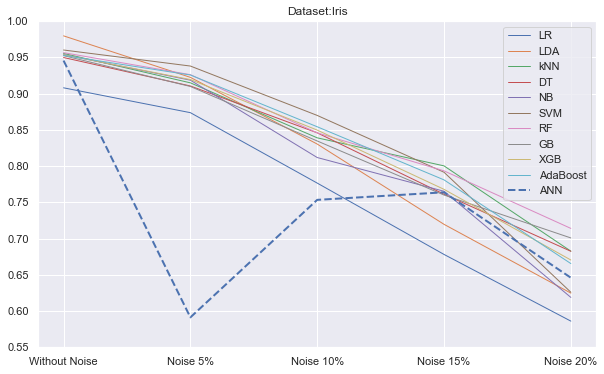

In [170]:
# Importing packages
import matplotlib.pyplot as plt

# Plot a simple line chart
fig, g = plt.subplots(figsize = (10,6))
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2.drop(columns=['Status','AdaBoost'],axis=1),linewidth=1)
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2['AdaBoost'],'--',linewidth=2)
plt.legend(f1_consolidated_results2.drop(columns=['Status'],axis=1),loc="upper right")
plt.ylim(0.55,1)
plt.title("Dataset:Iris")
plt.show()

fig.savefig('C:/Users/zpap/OneDrive - AholdDelhaize.com/Personal elements/04. Dimokritos_Files/2nd SEMESTER/Applied Data Science/Project/Python/Final Versions//Dataset Iris:Comparison of Algorithms.png')   # save the figure to file
plt.close(fig) 

### T-test Statistic 

In [139]:
from scipy.stats import ttest_ind as ttest

Hypothesis

H0: Noise does not effect the models efficiency f1_no_noise = f1_noise

H1: There is effect of noise in the models efficiency f1_no_noise <> f1_noise

#### T-test for data without noise

In [140]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -1.210849
p-value for two tailed test is 0.241613
Since p-value(=0.241613) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


### T-test for 5% noise

#### Compare with initial results

In [141]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_1['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 19.167328
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [142]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_1_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 4.086947
p-value for two tailed test is 0.000692
Since p-value(=0.000692) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 10% noise

#### Compare with initial results

In [143]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_2['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 12.262360
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other algorithms

In [144]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_2_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 10.598887
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 15% noise

#### Compare with initial results

In [145]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_3['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 15.063215
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [146]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_3_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 20.478741
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 20% noise

#### Compare with initial results

In [147]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_4['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 27.209812
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [148]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_4_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 33.337559
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### Kolmogorov-Smirnov 

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.

greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.

In [149]:
# Hypothesis

# H0: Noise does not effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB = f1_noise_mean_of_the_rest

# H1:  Noise does effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB <> f1_noise_mean_of_the_rest



### K-S for 5% noise

In [150]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_1['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.000011
Since p-value(=0.000011) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### K-S for 10% noise

In [151]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_2['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.002057
Since p-value(=0.002057) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### K-S for 15% noise

In [152]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_3['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.786930
Since p-value(=0.786930) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


### K-S for 20% noise

In [153]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_4['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


p-value for two tailed KS test is 0.994458
Since p-value(=0.994458) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


## Pearson correlation 

#### Adaboost Table

In [154]:
#create table
d1 = {
    'AdaBoost_initial': f1_results['AdaBoost'],
    'AdaBoost_noise_1': f1_results_noise_1['AdaBoost'],
    'AdaBoost_noise_2': f1_results_noise_2['AdaBoost'],
    'AdaBoost_noise_3': f1_results_noise_3['AdaBoost'],
    'AdaBoost_noise_4': f1_results_noise_4['AdaBoost']
    }
Adaboost_table = pd.DataFrame(d1)
Adaboost_table

,AdaBoost_initial,AdaBoost_noise_1,AdaBoost_noise_2,AdaBoost_noise_3,AdaBoost_noise_4
0,0.973064,0.692088,0.711128,0.774069,0.611159
1,0.930471,0.527029,0.739490,0.768215,0.667633
2,0.946397,0.608381,0.825051,0.706229,0.654948
3,0.957749,0.653199,0.813771,0.834377,0.653658
4,0.932088,0.604986,0.736400,0.753014,0.678971
5,0.946397,0.526503,0.765219,0.748401,0.642163
6,0.931818,0.543146,0.737747,0.769966,0.641597
7,0.946128,0.585742,0.785286,0.745811,0.593052
8,0.959596,0.543146,0.754841,0.800960,0.696967
9,0.932088,0.628704,0.665272,0.737303,0.619857


In [155]:
# Correlation between f1score of Adaboost and noise increase 

a = Adaboost_table.iloc[:,:1].squeeze()
     
b = Adaboost_table['AdaBoost_noise_1'].squeeze()

c = Adaboost_table['AdaBoost_noise_2'].squeeze()
  
d = Adaboost_table['AdaBoost_noise_3'].squeeze()    

e = Adaboost_table['AdaBoost_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)



noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)

df_cor = pd.concat([f1,noise], axis=1)

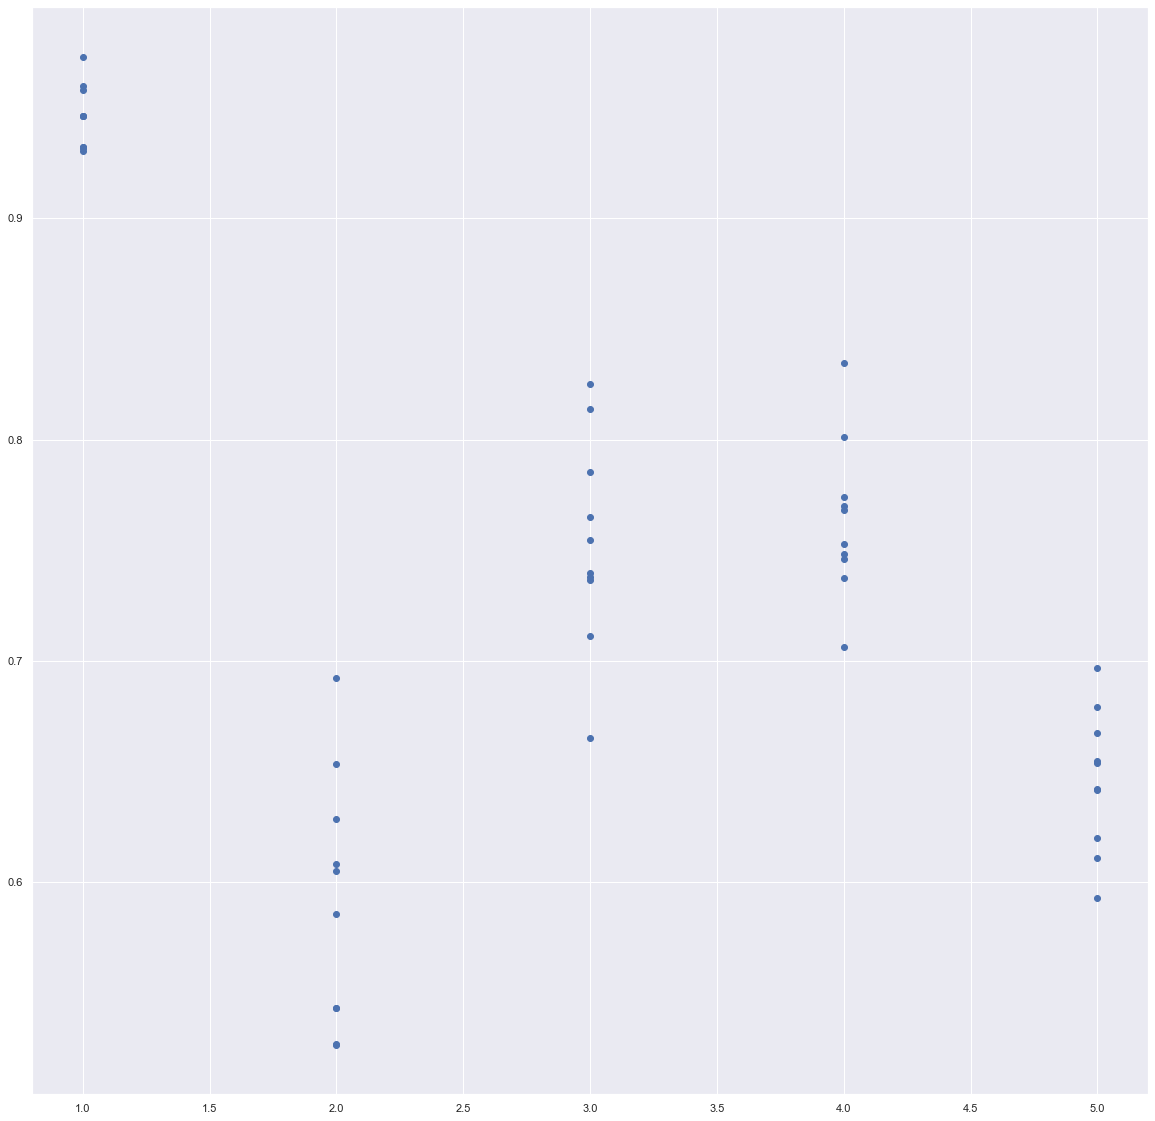

In [156]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [157]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000510) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.47 at 0.05 level of significance.
-0.4737769666917978


In [158]:
#create table
d2 = {
    'Other_Algorithms_initial': f1_results_other_algorithms,
    'Other_Algorithms_noise_1': f1_results_noise_1_other_algorithms,
    'Other_Algorithms_noise_2': f1_results_noise_2_other_algorithms,
    'Other_Algorithms_noise_3': f1_results_noise_3_other_algorithms,
    'Other_Algorithms_noise_4': f1_results_noise_4_other_algorithms
    }
Other_Algorithms_table = pd.DataFrame(d2)
Other_Algorithms_table

,Other_Algorithms_initial,Other_Algorithms_noise_1,Other_Algorithms_noise_2,Other_Algorithms_noise_3,Other_Algorithms_noise_4
0,0.970327,0.933104,0.810292,0.749929,0.678330
1,0.940734,0.919018,0.849674,0.765682,0.651092
2,0.950465,0.905855,0.801244,0.749774,0.702126
3,0.950504,0.926823,0.883751,0.784821,0.622979
4,0.951626,0.905603,0.823179,0.772426,0.665533
5,0.948707,0.918882,0.853842,0.754896,0.629825
6,0.947407,0.946431,0.853472,0.763071,0.641396
7,0.959186,0.874895,0.811904,0.748862,0.655086
8,0.963300,0.953158,0.881933,0.818292,0.689371
9,0.939946,0.875524,0.788913,0.710790,0.636128


In [159]:
# Correlation between f1score of Other algorithms mean value and noise increase 

a = Other_Algorithms_table.iloc[:,:1].squeeze()
     
b = Other_Algorithms_table['Other_Algorithms_noise_1'].squeeze()

c = Other_Algorithms_table['Other_Algorithms_noise_2'].squeeze()
  
d = Other_Algorithms_table['Other_Algorithms_noise_3'].squeeze()    

e = Other_Algorithms_table['Other_Algorithms_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)


noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)


df_cor = pd.concat([f1,noise], axis=1)

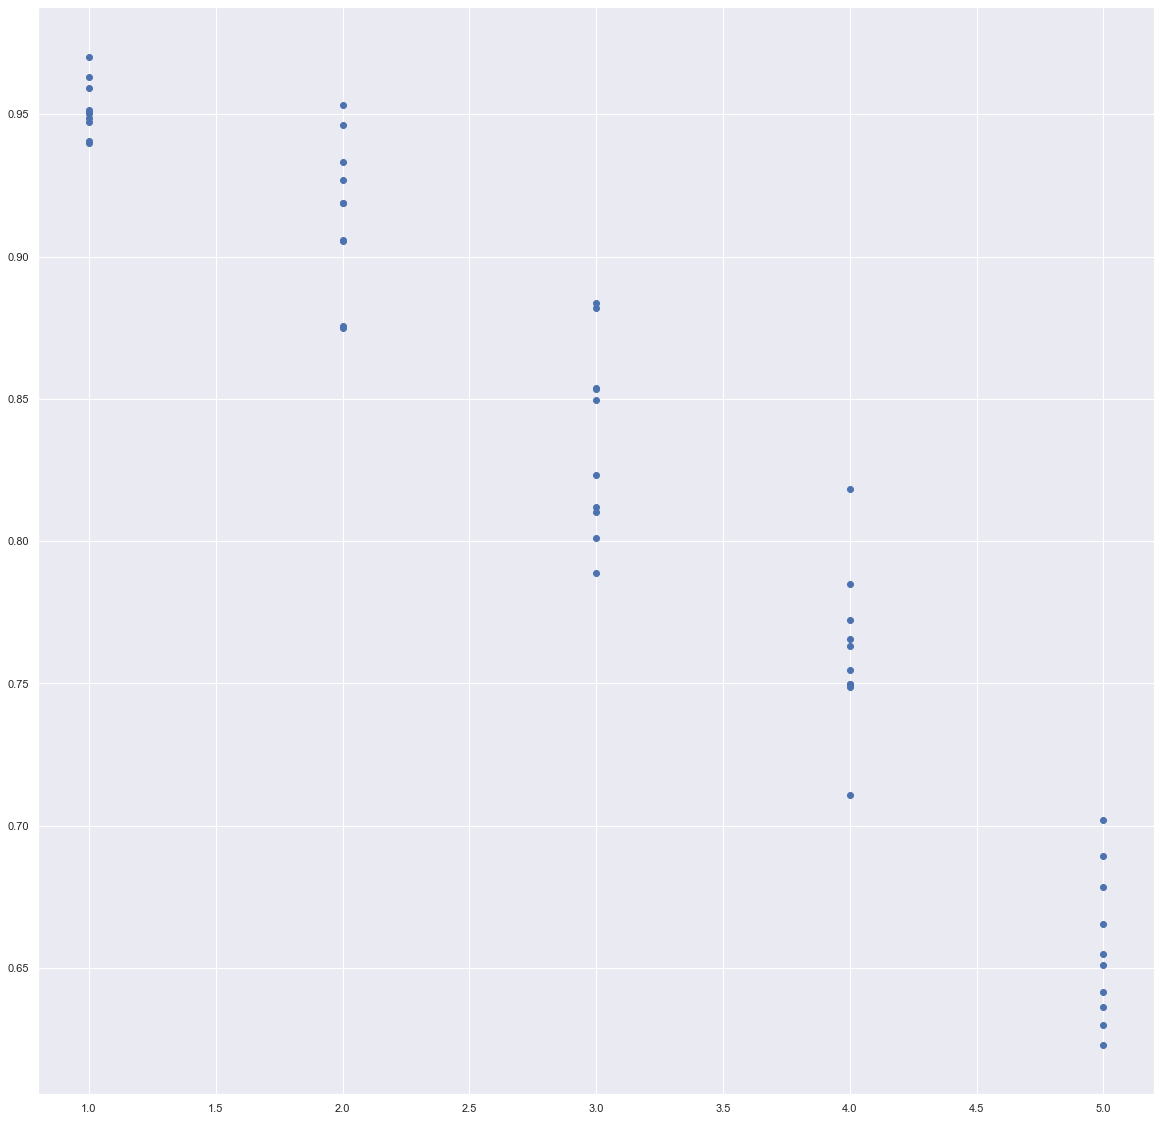

In [160]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [161]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.96 at 0.05 level of significance.
-0.9627010885248818
